# Librerias

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np

# Carga, visualizacion de los datos y Limpieza


## Carga

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


observamos las dimensiones del dataset

In [ ]:
df.shape

(303, 14)

age

sex

chest pain type (4 values)

resting blood pressure

serum cholestoral in mg/dl

fasting blood sugar > 120 mg/dl

resting electrocardiographic results (values 0,1,2)

maximum heart rate achieved

exercise induced angina

oldpeak = ST depression induced by exercise relative to rest

the slope of the peak exercise ST segment

number of major vessels (0-3) colored by flourosopy

thal: 0 = normal; 1 = fixed defect; 2 = reversable defect

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Visualizacion

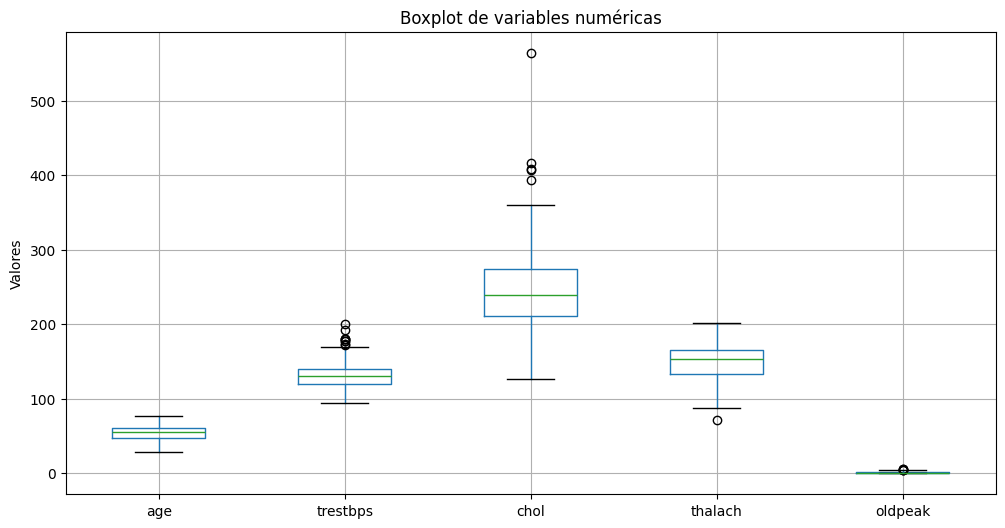

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar tu dataset
df = pd.read_csv("heart.csv")  # o el nombre de tu archivo

# Seleccionar solo columnas numéricas continuas
numeric_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(12,6))
df[numeric_cols].boxplot()
plt.title("Boxplot de variables numéricas")
plt.ylabel("Valores")
plt.show()


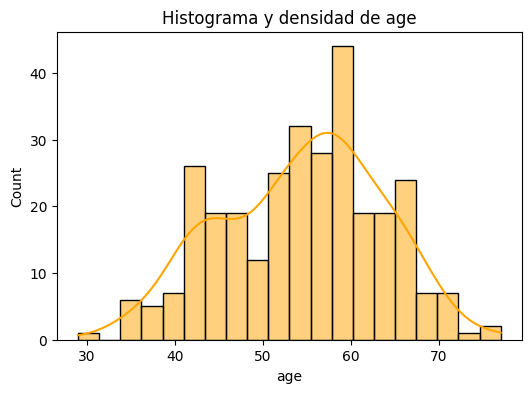

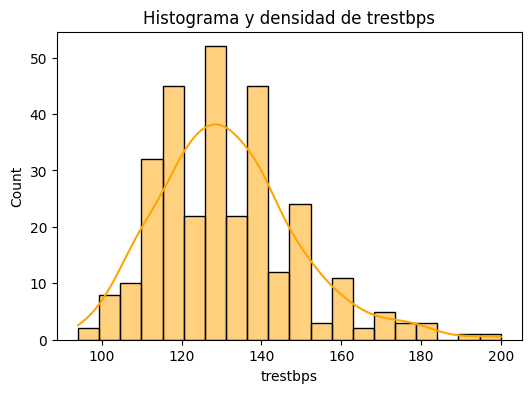

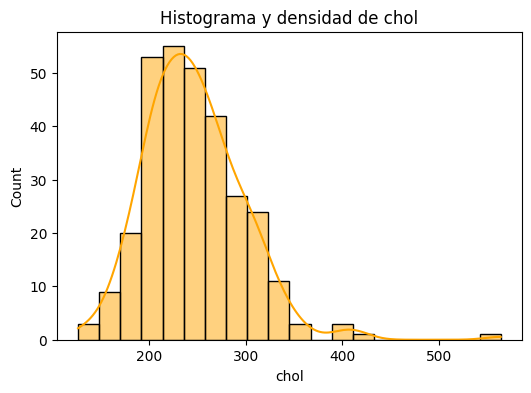

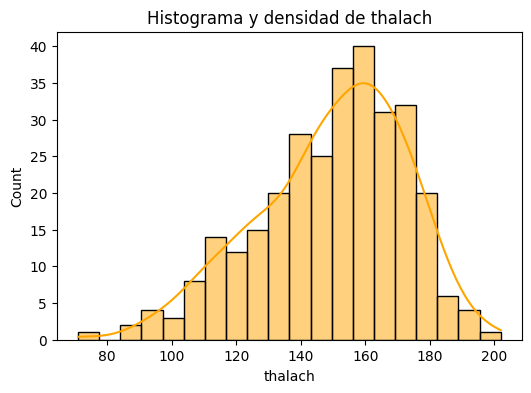

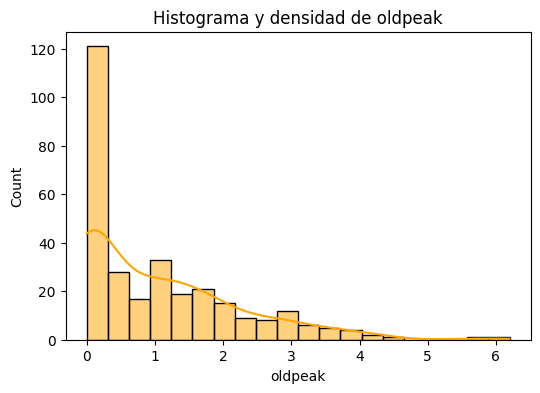

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=20, color='orange')
    plt.title(f"Histograma y densidad de {col}")
    plt.show()


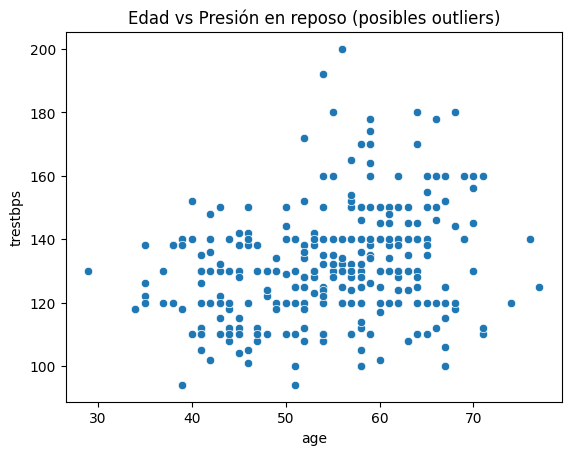

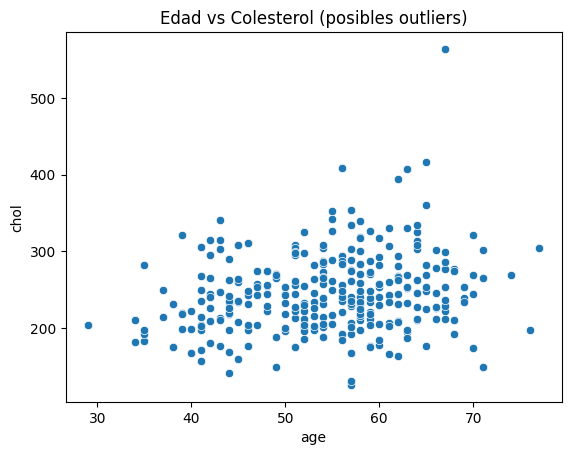

In [ ]:
sns.scatterplot(x='age', y='trestbps', data=df)
plt.title("Edad vs Presión en reposo (posibles outliers)")
plt.show()

sns.scatterplot(x='age', y='chol', data=df)
plt.title("Edad vs Colesterol (posibles outliers)")
plt.show()


In [ ]:
report = ProfileReport(df, title="My Data Profile", explorative=True)
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 14/14 [00:00<00:00, 63.94it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Vamos a atacar los datos que salieron con alertas

## Limpieza

In [ ]:
# Mostrar cantidad de duplicados antes
print("Duplicados antes:", df.duplicated().sum())

# Eliminar duplicados
df = df.drop_duplicates()

# Mostrar resultado
print("Duplicados después:", df.duplicated().sum())
print("Tamaño final del dataset:", df.shape)

Duplicados antes: 1
Duplicados después: 0
Tamaño final del dataset: (302, 14)


Dependencias

In [ ]:
import numpy as np
from scipy.stats import spearmanr
from sklearn.feature_selection import mutual_info_regression
import seaborn as sns
import matplotlib.pyplot as plt

# 1. CORRELACIÓN DE SPEARMAN (detecta relaciones monotónicas)
print("="*60)
print("CORRELACIÓN DE SPEARMAN (relaciones no lineales)")
print("="*60)

features = ['age', 'ca', 'chol', 'cp', 'exang', 'fbs',
                    'oldpeak', 'restecg', 'sex', 'slope',
                     'thal', 'thalach', 'trestbps']
X = df[features]
y = df['target']

spearman_corr = pd.DataFrame()
spearman_corr['Feature'] = features
spearman_corr['Spearman'] = [spearmanr(X[col], y)[0] for col in features]
spearman_corr['Pearson'] = [df[[col, 'target']].corr().iloc[0, 1] for col in features]
spearman_corr['Diferencia'] = abs(spearman_corr['Spearman'] - spearman_corr['Pearson'])

# Ordenar por diferencia (detecta no linealidad)
spearman_corr = spearman_corr.sort_values('Diferencia', ascending=False)
spearman_corr['No_Lineal'] = spearman_corr['Diferencia'].apply(
    lambda x: '⚠️ POSIBLE' if x > 0.1 else '✅ Lineal'
)

print(spearman_corr.to_string(index=False))


# 2. MUTUAL INFORMATION (detecta cualquier dependencia)
print("\n" + "="*60)
print("MUTUAL INFORMATION (cualquier tipo de relación)")
print("="*60)

mi_scores = mutual_info_regression(X, y, random_state=42)
mi_data = pd.DataFrame({
    'Feature': features,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)

print(mi_data.to_string(index=False))




CORRELACIÓN DE SPEARMAN (relaciones no lineales)
 Feature  Spearman   Pearson   Diferencia No_Lineal
    thal -0.402382 -0.343101 5.928174e-02  ✅ Lineal
      ca -0.466976 -0.408992 5.798442e-02  ✅ Lineal
    chol -0.117006 -0.081437 3.556929e-02  ✅ Lineal
      cp  0.459589  0.432080 2.750976e-02  ✅ Lineal
   slope  0.369391  0.343940 2.545105e-02  ✅ Lineal
trestbps -0.123478 -0.146269 2.279100e-02  ✅ Lineal
     age -0.234845 -0.221476 1.336946e-02  ✅ Lineal
 restecg  0.146223  0.134874 1.134863e-02  ✅ Lineal
 oldpeak -0.419631 -0.429146 9.515251e-03  ✅ Lineal
 thalach  0.426368  0.419955 6.412933e-03  ✅ Lineal
   exang -0.435601 -0.435601 2.775558e-16  ✅ Lineal
     fbs -0.026826 -0.026826 1.838807e-16  ✅ Lineal
     sex -0.283609 -0.283609 5.551115e-17  ✅ Lineal

MUTUAL INFORMATION (cualquier tipo de relación)
 Feature  MI_Score
      cp  0.144532
    thal  0.134395
      ca  0.105207
 oldpeak  0.101896
    chol  0.088795
   slope  0.081496
 thalach  0.081457
   exang  0.070090
   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

features_para_vif = ['age', 'ca', 'chol', 'cp', 'exang', 'fbs',
                    'oldpeak', 'restecg', 'sex', 'slope',
                     'thal', 'thalach', 'trestbps']

X = df[features_para_vif]

# Calcular VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Ordenar por VIF descendente
vif_data = vif_data.sort_values('VIF', ascending=False).reset_index(drop=True)

# Añadir interpretación
vif_data['Status'] = vif_data['VIF'].apply(
    lambda x: '❌ ELIMINAR' if x > 10 else ('⚠️ REVISAR' if x > 5 else '✅ OK')
)

print("\n" + "="*60)
print("ANÁLISIS DE MULTICOLINEALIDAD (VIF)")
print("="*60)
print(vif_data.to_string(index=False))
print("\n" + "="*60)
print("Interpretación:")
print("  VIF < 5:  ✅ Sin problemas de multicolinealidad")
print("  VIF 5-10: ⚠️  Multicolinealidad moderada")
print("  VIF > 10: ❌ Multicolinealidad severa - Considerar eliminar")
print("="*60)


ANÁLISIS DE MULTICOLINEALIDAD (VIF)
 Feature       VIF     Status
trestbps 58.776923 ❌ ELIMINAR
 thalach 42.631809 ❌ ELIMINAR
     age 39.567644 ❌ ELIMINAR
    chol 26.281421 ❌ ELIMINAR
    thal 17.141073 ❌ ELIMINAR
   slope 10.015857 ❌ ELIMINAR
     sex  3.507112       ✅ OK
 oldpeak  3.071361       ✅ OK
      cp  2.409980       ✅ OK
 restecg  2.051037       ✅ OK
   exang  2.022825       ✅ OK
      ca  1.860512       ✅ OK
     fbs  1.273256       ✅ OK

Interpretación:
  VIF < 5:  ✅ Sin problemas de multicolinealidad
  VIF 5-10: ⚠️  Multicolinealidad moderada
  VIF > 10: ❌ Multicolinealidad severa - Considerar eliminar


### Variables con VIF CRÍTICO (> 10):
Eliminar definitivamente:

trestbps (58.8) - Presión arterial: VIF altísimo + correlación 0.000 con target

chol (26.3) - Colesterol: VIF muy alto + correlación 0.061 con target

fbs - Aunque VIF bajo (1.27), correlación 0.000 con target

slope (10.0) - Borderline, pero oldpeak (VIF 3.07) es mejor predictor

### Decisión crítica sobre estas:

age (39.6): VIF altísimo PERO correlación 0.260 con target (importante
clínicamente)

thalach (42.6): VIF altísimo PERO correlación 0.406 con target (muy predictivo)

thal (17.1): VIF alto PERO correlación 0.522 con target (¡EL MÁS PREDICTIVO!)

In [ ]:
# Aplicar limpieza
df_limpio = df.drop(columns=['trestbps', 'chol', 'fbs', 'slope'])

# Verificar
print(f"Variables originales: {df.shape[1]}")
print(f"Variables después de limpieza: {df_limpio.shape[1]}")
print(f"\nVariables finales: {list(df_limpio.columns)}")

Variables originales: 14
Variables después de limpieza: 10

Variables finales: ['age', 'sex', 'cp', 'restecg', 'thalach', 'exang', 'oldpeak', 'ca', 'thal', 'target']


In [ ]:
df_limpio.head()

,age,sex,cp,restecg,thalach,exang,oldpeak,ca,thal,target
0,63,1,3,0,150,0,2.3,0,1,1
1,37,1,2,1,187,0,3.5,0,2,1
2,41,0,1,0,172,0,1.4,0,2,1
3,56,1,1,1,178,0,0.8,0,2,1
4,57,0,0,1,163,1,0.6,0,2,1


In [ ]:
df_limpio.shape

(302, 10)

Outliers

In [ ]:
# CÓDIGO SUGERIDO PARA AGREGAR:

from scipy import stats

# Método 1: Z-Score (para distribuciones normales)
def remove_outliers_zscore(df, columns, threshold=3):
    df_clean = df.copy()
    for col in columns:
        z_scores = np.abs(stats.zscore(df_clean[col]))
        df_clean = df_clean[z_scores < threshold]
    return df_clean

# Método 2: IQR (Intercuartile Range) - más robusto
def remove_outliers_iqr(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) &
                            (df_clean[col] <= upper_bound)]
    return df_clean

# Aplicar IQR a variables continuas
numeric_cols = ['age', 'oldpeak', 'thalach']
print(f"Registros antes: {df_limpio.shape[0]}")
df_limpio = remove_outliers_iqr(df_limpio, numeric_cols)
print(f"Registros después: {df_limpio.shape[0]}")

Registros antes: 302
Registros después: 296


In [ ]:
# CÓDIGO SUGERIDO:

# 1. Índice de riesgo cardiovascular
df_limpio['risk_index'] = (
    df_limpio['age'] * 0.3 +
    df_limpio['oldpeak'] * 0.4 +
    df_limpio['ca'] * 0.3
) / 3

# 2. Interacción edad-frecuencia cardíaca
df_limpio['age_thalach_interaction'] = df_limpio['age'] * df_limpio['thalach']

# 3. Categorización de edad
df_limpio['age_group'] = pd.cut(df_limpio['age'],
                                 bins=[0, 45, 60, 100],
                                 labels=['young', 'middle', 'senior'])

# 4. Ratio de variables relacionadas
df_limpio['oldpeak_ca_ratio'] = df_limpio['oldpeak'] / (df_limpio['ca'] + 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# 1. NORMALIZACIÓN de variables numéricas
scaler = StandardScaler()
numeric_features = ['age', 'oldpeak', 'thalach']
df_limpio[numeric_features] = scaler.fit_transform(df_limpio[numeric_features])

# 2. CODIFICACIÓN de variables categóricas
# One-Hot Encoding para variables nominales (ya numéricas después del paso)
df_limpio = pd.get_dummies(
    df_limpio,
    columns=['cp', 'restecg', 'thal', 'age_group'],  #  añadimos age_group
    drop_first=True,
    dtype=int
)

# 3. Asegurar que todas las columnas binarias sean enteros (0 o 1)
df_limpio = df_limpio.astype({
    col: 'int' for col in df_limpio.columns
    if df_limpio[col].dropna().isin([0, 1]).all()
})

# 4. Verificar resultado
print("\nVariables después de transformaciones:")
print(df_limpio.dtypes)
print(f"\nDimensiones finales: {df_limpio.shape}")




Variables después de transformaciones:
age                        float64
sex                          int64
thalach                    float64
exang                        int64
oldpeak                    float64
ca                           int64
target                       int64
risk_index                 float64
age_thalach_interaction      int64
oldpeak_ca_ratio           float64
cp_1                         int64
cp_2                         int64
cp_3                         int64
restecg_1                    int64
restecg_2                    int64
thal_1                       int64
thal_2                       int64
thal_3                       int64
age_group_middle             int64
age_group_senior             int64
dtype: object

Dimensiones finales: (296, 20)


In [ ]:
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296 entries, 0 to 302
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      296 non-null    float64
 1   sex                      296 non-null    int64  
 2   thalach                  296 non-null    float64
 3   exang                    296 non-null    int64  
 4   oldpeak                  296 non-null    float64
 5   ca                       296 non-null    int64  
 6   target                   296 non-null    int64  
 7   risk_index               296 non-null    float64
 8   age_thalach_interaction  296 non-null    int64  
 9   oldpeak_ca_ratio         296 non-null    float64
 10  cp_1                     296 non-null    int64  
 11  cp_2                     296 non-null    int64  
 12  cp_3                     296 non-null    int64  
 13  restecg_1                296 non-null    int64  
 14  restecg_2                296 no

In [ ]:
df_limpio.shape

(296, 20)

In [ ]:
df_limpio.describe()

,age,sex,thalach,exang,oldpeak,ca,target,risk_index,age_thalach_interaction,oldpeak_ca_ratio,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3,age_group_middle,age_group_senior
count,2.960000e+02,296.000000,2.960000e+02,296.000000,2.960000e+02,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000,296.000000
mean,-2.400482e-17,0.679054,3.360675e-16,0.327703,9.601929e-17,0.702703,0.550676,5.634077,8076.935811,0.661852,0.168919,0.290541,0.074324,0.500000,0.010135,0.057432,0.554054,0.381757,0.527027,0.260135
std,1.001693e+00,0.467631,1.001693e+00,0.470171,1.001693e+00,0.987786,0.498268,0.985304,1464.437005,0.790049,0.375315,0.454781,0.262742,0.500847,0.100332,0.233061,0.497911,0.486640,0.500115,0.439451
min,-2.791640e+00,0.000000,-2.766490e+00,0.000000,-9.313269e-01,0.000000,0.000000,2.900000,4550.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.081946e-01,0.000000,-6.511512e-01,0.000000,-9.313269e-01,0.000000,0.000000,4.856667,6989.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.333686e-02,1.000000,1.504508e-01,0.000000,-3.121586e-01,0.000000,1.000000,5.746667,8149.000000,0.425000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,7.344854e-01,1.000000,7.182523e-01,1.000000,5.927796e-01,1.000000,1.000000,6.395000,9128.500000,1.054167,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,2.497548e+00,1.000000,2.310323e+00,1.000000,2.878939e+00,4.000000,1.000000,8.000000,12474.000000,3.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Exportar df limpio a CSV
df_limpio.to_csv('df_limpio_modelo.csv', index=False)
